In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np


In [2]:
print(torch.__version__)

2.8.0+cu128


# Question 1

In [3]:
# Create a straight line dataset using the linear regression formula (weight * X + bias)

weight = 0.3
bias = 0.9

x = torch.range(0,1, 0.01).unsqueeze(dim=1)
y = weight * x + bias

# Making splits

test_split = (int) (0.8 * len(x))

X_train, y_train = x[:test_split], y[:test_split]
X_test, y_test = x[test_split:],y[test_split:]


/tmp/ipykernel_19370/4202379142.py:6: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(0,1, 0.01).unsqueeze(dim=1)


In [4]:
len(X_train),len(X_test),len(y_train),len(y_test)

(80, 21, 80, 21)

In [5]:
X_train

tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900],
        [0.1000],
        [0.1100],
        [0.1200],
        [0.1300],
        [0.1400],
        [0.1500],
        [0.1600],
        [0.1700],
        [0.1800],
        [0.1900],
        [0.2000],
        [0.2100],
        [0.2200],
        [0.2300],
        [0.2400],
        [0.2500],
        [0.2600],
        [0.2700],
        [0.2800],
        [0.2900],
        [0.3000],
        [0.3100],
        [0.3200],
        [0.3300],
        [0.3400],
        [0.3500],
        [0.3600],
        [0.3700],
        [0.3800],
        [0.3900],
        [0.4000],
        [0.4100],
        [0.4200],
        [0.4300],
        [0.4400],
        [0.4500],
        [0.4600],
        [0.4700],
        [0.4800],
        [0.4900],
        [0.5000],
        [0.5100],
        [0.5200],
        [0.5300],
        [0.5400],
        [0

In [6]:
X_test

tensor([[0.8000],
        [0.8100],
        [0.8200],
        [0.8300],
        [0.8400],
        [0.8500],
        [0.8600],
        [0.8700],
        [0.8800],
        [0.8900],
        [0.9000],
        [0.9100],
        [0.9200],
        [0.9300],
        [0.9400],
        [0.9500],
        [0.9600],
        [0.9700],
        [0.9800],
        [0.9900],
        [1.0000]])

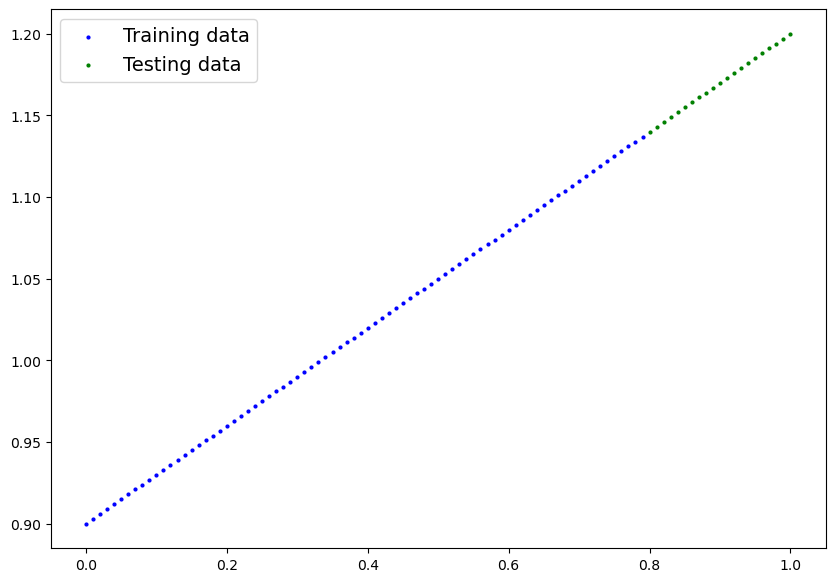

In [7]:
def plot_predictions(train_data= X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predicitions = None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels,c='b',s=4,label='Training data')
    plt.scatter(test_data,test_labels,c='g',s=4,label='Testing data')

    if predicitions is not None:
        plt.scatter(test_data,predicitions,c='r',s=4, label='Predictions')
    plt.legend(prop = {"size" : 14})
plot_predictions()

# Question 2

In [8]:
from torch import nn

In [9]:

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(
            1,
            requires_grad=True,
            dtype=torch.float
        ))
        
        self.bias = nn.Parameter(torch.randn(
            1,
            requires_grad=True,
            dtype=torch.float
        ))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias


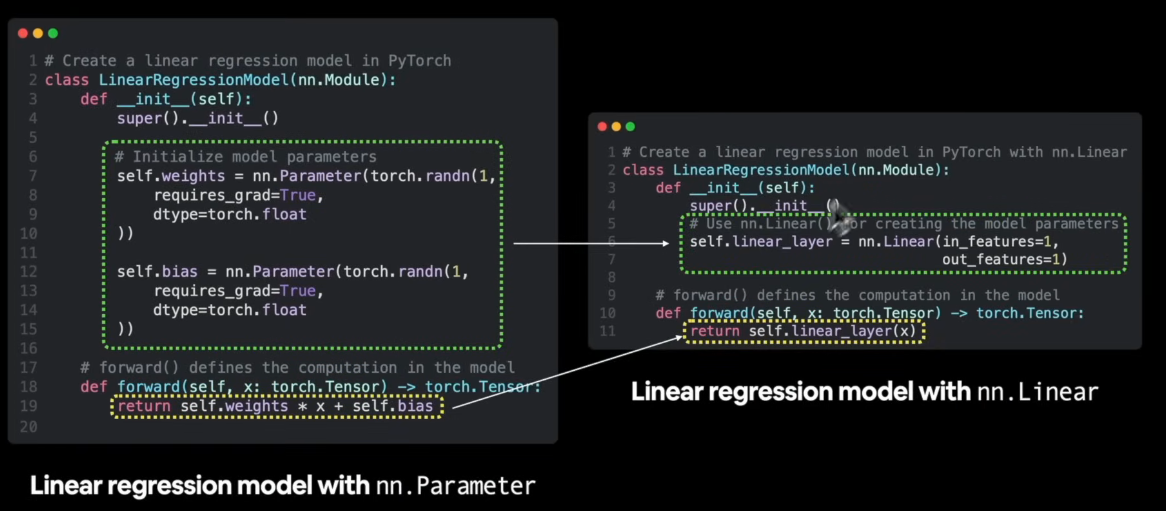

In [10]:
torch.manual_seed(42)
device = "cuda" if torch.cuda.is_available() else "cpu"

model_0 = LinearRegressionModel()
model_0.to(device)
list(model_0.parameters())
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367], device='cuda:0')),
             ('bias', tensor([0.1288], device='cuda:0'))])

# Question 3

In [11]:
lr = 0.01
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(lr=lr,params=model_0.parameters())

In [12]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model_0.to(device)

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)


In [13]:
torch.manual_seed(42)

epochs = 200

epoch_count = []
loss_values =[]
test_loss_values =[]

for epoch in range(1, epochs + 1):
    model_0.train()
    y_pred = model_0(X_train)

    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()

    loss.backward()
    optimizer.step() 

    if epoch % 20 == 0:
        model_0.eval()
        with torch.inference_mode():
          y_preds = model_0(X_test)
          test_loss = loss_fn(y_preds,y_test)
          print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")


Epoch: 20 | Train loss: 0.537 | Test loss: 0.467
Epoch: 40 | Train loss: 0.306 | Test loss: 0.196
Epoch: 60 | Train loss: 0.082 | Test loss: 0.066
Epoch: 80 | Train loss: 0.053 | Test loss: 0.117
Epoch: 100 | Train loss: 0.046 | Test loss: 0.107
Epoch: 120 | Train loss: 0.039 | Test loss: 0.091
Epoch: 140 | Train loss: 0.032 | Test loss: 0.076
Epoch: 160 | Train loss: 0.025 | Test loss: 0.059
Epoch: 180 | Train loss: 0.018 | Test loss: 0.043
Epoch: 200 | Train loss: 0.012 | Test loss: 0.027


# Question 4

In [14]:

model_0.eval()

with torch.inference_mode():
    predictions = model_0(X_test)

predictions

tensor([[1.1612],
        [1.1648],
        [1.1683],
        [1.1719],
        [1.1755],
        [1.1790],
        [1.1826],
        [1.1862],
        [1.1897],
        [1.1933],
        [1.1968],
        [1.2004],
        [1.2040],
        [1.2075],
        [1.2111],
        [1.2146],
        [1.2182],
        [1.2218],
        [1.2253],
        [1.2289],
        [1.2325]], device='cuda:0')

In [15]:
predictions.cpu()

tensor([[1.1612],
        [1.1648],
        [1.1683],
        [1.1719],
        [1.1755],
        [1.1790],
        [1.1826],
        [1.1862],
        [1.1897],
        [1.1933],
        [1.1968],
        [1.2004],
        [1.2040],
        [1.2075],
        [1.2111],
        [1.2146],
        [1.2182],
        [1.2218],
        [1.2253],
        [1.2289],
        [1.2325]])

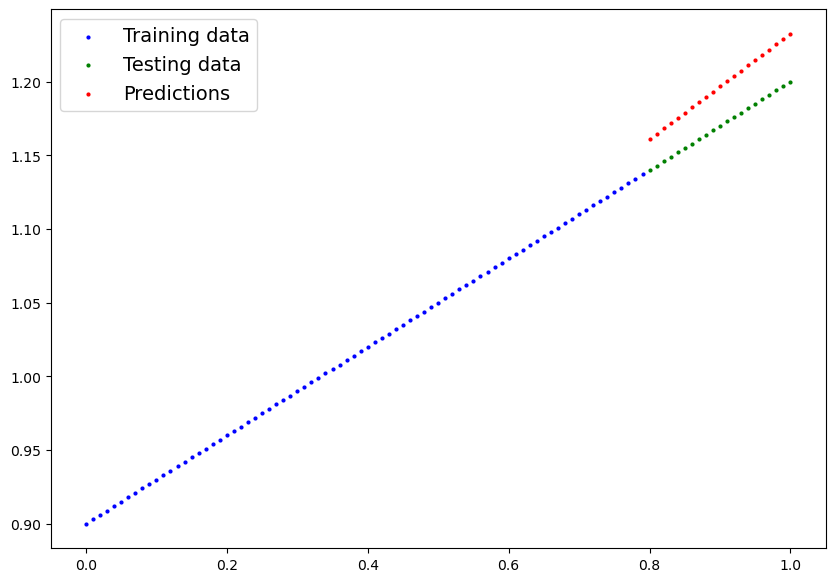

In [16]:
plot_predictions(predicitions=y_preds.cpu())

# Question 5

In [17]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3561], device='cuda:0')),
             ('bias', tensor([0.8763], device='cuda:0'))])

In [18]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "exercise1.pth"

MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(model_0.state_dict(),MODEL_SAVE_PATH)

In [19]:
!ls -l models/

total 4
-rw-rw-r-- 1 orlando orlando 1909 nov 27 08:39 exercise1.pth


In [20]:
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model.to(device)

LinearRegressionModel()

In [21]:
new_preds = loaded_model(X_test)
predictions == new_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')